# k-Nearest Neighbor (kNN) exercise

*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

The kNN classifier consists of two stages:

- During training, the classifier takes the training data and simply remembers it
- During testing, kNN classifies every test image by comparing to all training images and transfering the labels of the k most similar training examples
- The value of k is cross-validated

In this exercise you will implement these steps and understand the basic Image Classification pipeline, cross-validation, and gain proficiency in writing efficient, vectorized code.

  
  # 목차

    I.	CIFAR-10 데이터 불러오기
    II.	데이터 가공하기
    III.	학습시키기
    IV.	예측하기 (Two_loop)
    V.	다양한 예측 (Two_loop, One_loop, No_loop) 비교하기
    VI.	Cross Validation 

# I. CIFAR-10 데이터 불러오기

### 1. 필요한 모듈을 import 해 준다

In [2]:
# Run some setup code for this notebook.

import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

RuntimeError: Python is not installed as a framework. The Mac OS X backend will not be able to function correctly if Python is not installed as a framework. See the Python documentation for more information on installing Python as a framework on Mac OS X. Please either reinstall Python as a framework, or try one of the other backends. If you are Working with Matplotlib in a virtual enviroment see 'Working with Matplotlib in Virtual environments' in the Matplotlib FAQ

### 2. Jupyter Notebook에서 사용할 matplotlib 관련 설정을 해 준다

In [7]:
# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

### 3. CIFAR-10 데이터를 불러온다.

In [8]:
# Load the raw CIFAR-10 data.
cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print 'Training data shape: ', X_train.shape
print 'Training labels shape: ', y_train.shape
print 'Test data shape: ', X_test.shape
print 'Test labels shape: ', y_test.shape

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


### 4. 불러온 데이터 중 일부를 눈으로 확인하자

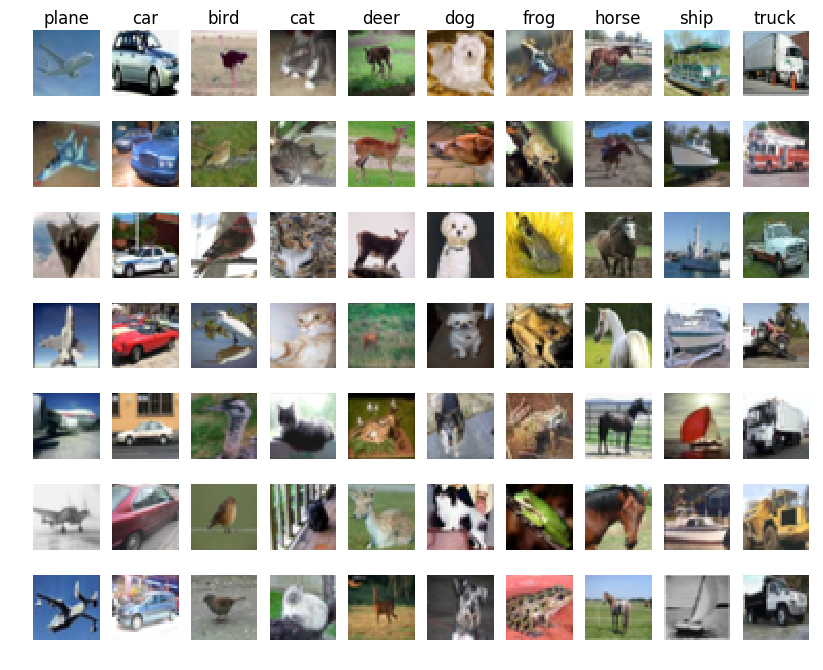

In [9]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes) # 10
samples_per_class = 7

for y, cls in enumerate(classes): # 10 loops
    idxs = np.flatnonzero(y_train == y) # (5000,)
    idxs = np.random.choice(idxs, samples_per_class, replace=False) # (7,)
    for i, idx in enumerate(idxs): # 7 loops
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
# plt.show()

# II. 데이터 가공하기

### 1.	실행의 편의를 위해 데이터의 크기를 줄여 준다

In [10]:
# Subsample the data for more efficient code execution in this exercise
num_training = 5000
mask = range(num_training)
X_train = X_train[mask] # (5000,32,32,3)
y_train = y_train[mask] # (5000,)

num_test = 500
mask = range(num_test)
X_test = X_test[mask] # (500,32,32,3)
y_test = y_test[mask] # (500,)

### 2. 이미지 데이터를 row로 변형해 준다

In [11]:
# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print X_train.shape, X_test.shape

(5000, 3072) (500, 3072)


# III. 모델 학습시키기

### 1. 트레이닝 데이터를 넣어 모델을 학습시킨다

In [12]:
from cs231n.classifiers import KNearestNeighbor

# Create a kNN classifier instance. 
# Remember that training a kNN classifier is a noop: 
# the Classifier simply remembers the data and does no further processing 
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

We would now like to classify the test data with the kNN classifier. Recall that we can break down this process into two steps: 

1. First we must compute the distances between all test examples and all train examples. 
2. Given these distances, for each test example we find the k nearest examples and have them vote for the label

Lets begin with computing the distance matrix between all training and test examples. For example, if there are **Ntr** training examples and **Nte** test examples, this stage should result in a **Nte x Ntr** matrix where each element (i,j) is the distance between the i-th test and j-th train example.

First, open `cs231n/classifiers/k_nearest_neighbor.py` and implement the function `compute_distances_two_loops` that uses a (very inefficient) double loop over all pairs of (test, train) examples and computes the distance matrix one element at a time.

# IV. 예측하기

### 1. Two_loop 함수에 테스트 데이터를 넣어 학습 데이터 각각과의 차이를 구한다

In [13]:
# Open cs231n/classifiers/k_nearest_neighbor.py and implement
# compute_distances_two_loops.

# Test your implementation:
dists = classifier.compute_distances_two_loops(X_test)

### 2. 테스트 데이터와 학습 데이터의 차이를 시각화해 본다

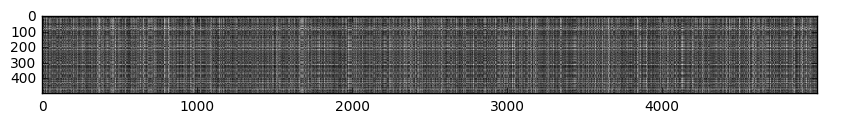

In [14]:
# We can visualize the distance matrix: each row is a single test example and
# its distances to training examples
plt.imshow(dists, interpolation='none')
# plt.imshow(dists[:,:], interpolation='none') # the same result
# plt.show()

In [15]:
dists[0][:10]

array([ 3803.92350081,  4210.59603857,  5504.0544147 ,  3473.88960677,
        4371.58632535,  4447.85127899,  3886.35060179,  4058.59187404,
        5175.54760388,  4678.74855063])

In [16]:
k=5
dists[0][:10].argsort()[:k]

array([3, 0, 6, 7, 1])

In [17]:
dists[1][:10]

array([ 6336.83367306,  5270.28006846,  4040.63608854,  6430.498892  ,
        5350.64407338,  6094.37987001,  5271.94688896,  6546.65173963,
        5710.24097565,  6404.07628   ])

In [18]:
dists[1][:10].argsort()[:5]

array([2, 1, 6, 4, 8])

In [19]:
nearest_ys = y_train[dists[1][:10].argsort()[:5]]
nearest_ys

array([9, 9, 2, 1, 8])

In [20]:
np.bincount(nearest_ys)

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 2])

In [21]:
np.argmax(np.bincount(nearest_ys))

9

**Inline Question #1:** Notice the structured patterns in the distance matrix, where some rows or columns are visible brighter. (Note that with the default color scheme black indicates low distances while white indicates high distances.)

- What in the data is the cause behind the distinctly bright rows?
- What causes the columns?

**Your Answer**: *fill this in.*

Bright rows represent test images which are very far from all the train images in L2 distance; bright columns represent training images which is far from all the test images in L2 distance.

### 3. k=1 인 경우에 레이블을 예측한 후 정확도를 계산한다

In [22]:
# Now implement the function predict_labels and run the code below:
# We use k = 1 (which is Nearest Neighbor).
y_test_pred = classifier.predict_labels(dists, k=1) # (500,)

# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print 'Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy)

Got 137 / 500 correct => accuracy: 0.274000


You should expect to see approximately `27%` accuracy. Now lets try out a larger `k`, say `k = 5`:

### 4. k=5 인 경우에 레이블을 예측한 후 정확도를 계산한다

In [23]:
y_test_pred = classifier.predict_labels(dists, k=5)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print 'Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy)

Got 139 / 500 correct => accuracy: 0.278000


You should expect to see a slightly better performance than with `k = 1`.

# V. 실행속도 높여주고 비교해 보기

### 1.  One_loop 함수에 테스트 데이터를 넣어 학습 데이터 각각과의 차이를 구한다

In [24]:
# Now lets speed up distance matrix computation by using partial vectorization
# with one loop. Implement the function compute_distances_one_loop and run the
# code below:
dists_one = classifier.compute_distances_one_loop(X_test)

### 2. Two_loop함수와 One_loop 함수에서의 결과를 비교한다

In [25]:
# To ensure that our vectorized implementation is correct, we make sure that it
# agrees with the naive implementation. There are many ways to decide whether
# two matrices are similar; one of the simplest is the Frobenius norm. In case
# you haven't seen it before, the Frobenius norm of two matrices is the square
# root of the squared sum of differences of all elements; in other words, reshape
# the matrices into vectors and compute the Euclidean distance between them.
difference = np.linalg.norm(dists - dists_one, ord='fro')
print 'Difference was: %f' % (difference, )
if difference < 0.001:
  print 'Good! The distance matrices are the same'
else:
  print 'Uh-oh! The distance matrices are different'

Difference was: 0.000000
Good! The distance matrices are the same


### 3. No_loop 함수에 테스트 데이터를 넣어 학습 데이터 각각과의 차이를 구한다

In [26]:
# Now implement the fully vectorized version inside compute_distances_no_loops
# and run the code
dists_two = classifier.compute_distances_no_loops(X_test)

### 4. Two_loop 함수와 No_loop 함수에서의 결과를 비교한다

In [27]:
# check that the distance matrix agrees with the one we computed before:
difference = np.linalg.norm(dists - dists_two, ord='fro')
print 'Difference was: %f' % (difference, ) # WHY NOT print 'Difference was: %f' % difference
if difference < 0.001:
  print 'Good! The distance matrices are the same'
else:
  print 'Uh-oh! The distance matrices are different'

Difference was: 0.000000
Good! The distance matrices are the same


### 5.  Two_loop 함수, One_loop 함수, No_loop 함수의 소요시간을 비교한다

In [28]:
# Let's compare how fast the implementations are
def time_function(f, *args): # 인자로 함수와 이 함수의 인자를 받는다!
  """
  Call a function f with args and return the time (in seconds) that it took to execute.
  """
  import time
  tic = time.time()
  f(*args) # 인자로 받은 함수를 인자를 이용해 호출한다.
  toc = time.time()
  return toc - tic

two_loop_time = time_function(classifier.compute_distances_two_loops, X_test)
print 'Two loop version took %f seconds' % two_loop_time

one_loop_time = time_function(classifier.compute_distances_one_loop, X_test) # WHY took more time???
print 'One loop version took %f seconds' % one_loop_time

no_loop_time = time_function(classifier.compute_distances_no_loops, X_test)
print 'No loop version took %f seconds' % no_loop_time

# you should see significantly faster performance with the fully vectorized implementation

Two loop version took 50.214250 seconds
One loop version took 59.345722 seconds
No loop version took 0.577849 seconds


# VI. Cross Validation 을 통해 최적의 k 값을 구하고 이 k 값에서의 정확도 구하기

### Cross-validation

We have implemented the k-Nearest Neighbor classifier but we set the value k = 5 arbitrarily. We will now determine the best value of this hyperparameter with cross-validation.

### 1.  학습 데이터를 나눠 담을 폴더를 5개 만들어 주고 최적의 k 후보 10개를 설정해 준다

In [29]:
num_folds = 5
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]

### 2.  학습 데이터를 5개로 나눠서 각각의 폴더에 넣어 준다

In [30]:
X_train_folds = []
y_train_folds = []

################################################################################
# TODO:                                                                        #
# Split up the training data into folds. After splitting, X_train_folds and    #
# y_train_folds should each be lists of length num_folds, where                #
# y_train_folds[i] is the label vector for the points in X_train_folds[i].     #
# Hint: Look up the numpy array_split function.                                #
################################################################################
X_train_folds = np.array_split(X_train, num_folds) # list
y_train_folds = np.array_split(y_train, num_folds) # list
# print np.array(X_train_folds).shape # (5, 1000, 3072)
# print np.array(y_train_folds).shape # (5, 1000)
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

### 3. 각각의 k 값에 대한 정확도를 계산해 준다

In [31]:
# A dictionary holding the accuracies for different values of k that we find
# when running cross-validation. After running cross-validation,
# k_to_accuracies[k] should be a list of length num_folds giving the different
# accuracy values that we found when using that value of k.
k_to_accuracies = {} # dictionary

################################################################################
# TODO:                                                                        #
# Perform k-fold cross validation to find the best value of k. For each        #
# possible value of k, run the k-nearest-neighbor algorithm num_folds times,   #
# where in each case you use all but one of the folds as training data and the #
# last fold as a validation set. Store the accuracies for all fold and all     #
# values of k in the k_to_accuracies dictionary.                               #
################################################################################
for k_i, k in enumerate(k_choices): # 10 loops
    k_to_accuracies[k] = []
    for i in range(num_folds): # 5 loops
        classifier = KNearestNeighbor()
        X_val = X_train_folds[i] # (1000, 3072)
        Y_val = y_train_folds[i] # (1000,)
        X_tr = np.vstack(X_train_folds[:i]+X_train_folds[i+1:]) # (4000, 3072)
        Y_tr = np.hstack(y_train_folds[:i]+y_train_folds[i+1:]) # (4000,)
    
        classifier.train(X_tr, Y_tr)
        y_val_pred = classifier.predict(X_val,k,0)
        num_correct = np.sum(y_val_pred == Y_val)
        accuracy = float(num_correct) / len(Y_val)
        k_to_accuracies[k].append(accuracy)
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

### 4. 각각의 k 값에 대한 정확도를 출력해 준다

In [32]:
# Print out the computed accuracies
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print 'k = %d, accuracy = %f' % (k, accuracy)

k = 1, accuracy = 0.263000
k = 1, accuracy = 0.257000
k = 1, accuracy = 0.264000
k = 1, accuracy = 0.278000
k = 1, accuracy = 0.266000
k = 3, accuracy = 0.239000
k = 3, accuracy = 0.249000
k = 3, accuracy = 0.240000
k = 3, accuracy = 0.266000
k = 3, accuracy = 0.254000
k = 5, accuracy = 0.248000
k = 5, accuracy = 0.266000
k = 5, accuracy = 0.280000
k = 5, accuracy = 0.292000
k = 5, accuracy = 0.280000
k = 8, accuracy = 0.262000
k = 8, accuracy = 0.282000
k = 8, accuracy = 0.273000
k = 8, accuracy = 0.290000
k = 8, accuracy = 0.273000
k = 10, accuracy = 0.265000
k = 10, accuracy = 0.296000
k = 10, accuracy = 0.276000
k = 10, accuracy = 0.284000
k = 10, accuracy = 0.280000
k = 12, accuracy = 0.260000
k = 12, accuracy = 0.295000
k = 12, accuracy = 0.279000
k = 12, accuracy = 0.283000
k = 12, accuracy = 0.280000
k = 15, accuracy = 0.252000
k = 15, accuracy = 0.289000
k = 15, accuracy = 0.278000
k = 15, accuracy = 0.282000
k = 15, accuracy = 0.274000
k = 20, accuracy = 0.270000
k = 20, accu

In [33]:
k_to_accuracies

{1: [0.263, 0.257, 0.264, 0.278, 0.266],
 3: [0.239, 0.249, 0.24, 0.266, 0.254],
 5: [0.248, 0.266, 0.28, 0.292, 0.28],
 8: [0.262, 0.282, 0.273, 0.29, 0.273],
 10: [0.265, 0.296, 0.276, 0.284, 0.28],
 12: [0.26, 0.295, 0.279, 0.283, 0.28],
 15: [0.252, 0.289, 0.278, 0.282, 0.274],
 20: [0.27, 0.279, 0.279, 0.282, 0.285],
 50: [0.271, 0.288, 0.278, 0.269, 0.266],
 100: [0.256, 0.27, 0.263, 0.256, 0.263]}

### 5. 각각의 k 값에 대한 정확도를 시각화해 준다

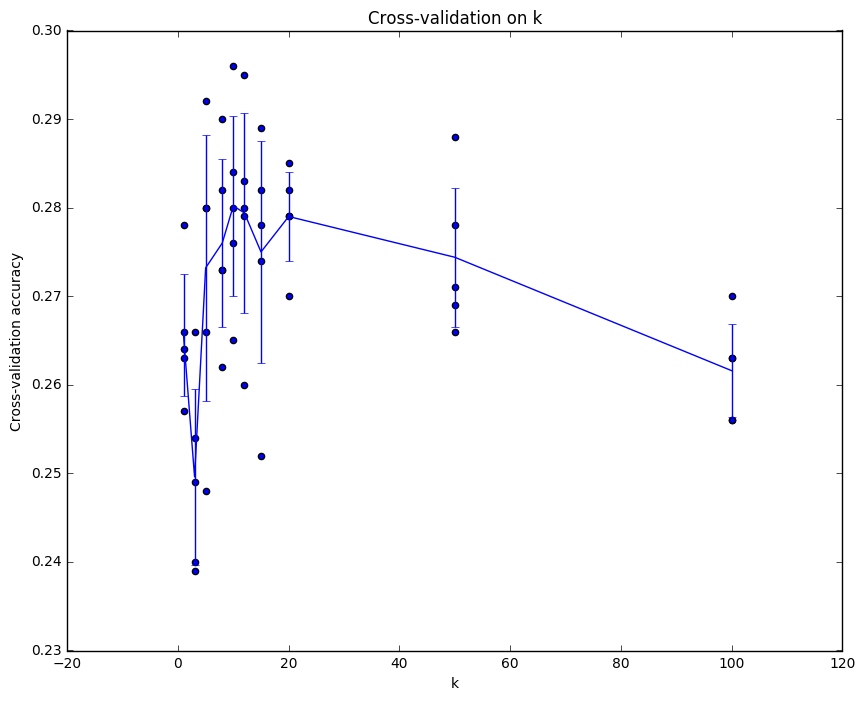

In [34]:
# plot the raw observations
for k in k_choices:
  accuracies = k_to_accuracies[k] # len(accuracies) = 5
  plt.scatter([k] * len(accuracies), accuracies) # accuracies != integer
  # [k] * 5 = [k,k,k,k,k]  # Scatter 5 points altogether. 

# plot the trend line with error bars that correspond to standard deviation
accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())]) # dictionary = sorted
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

Need a better strategy for comparing two distributions to derive which one is best. E.g., http://quant.stackexchange.com/questions/2294/how-can-i-compare-distributions-using-only-mean-and-standard-deviation

For now let's go with the one with highest mean CV accuracy:

### 6. 최적의 k 값을 구해 출력해 준다

In [35]:
best_k = sorted(k_to_accuracies.keys())[np.argmax(accuracies_mean)] # 10
print best_k

10


### 7. 최적의 k 값에서의 정확도를 구해 출력해 준다

In [36]:
# Based on the cross-validation results above, choose the best value for k,   
# retrain the classifier using all the training data, and test it on the test
# data. You should be able to get above 28% accuracy on the test data.

classifier = KNearestNeighbor()
classifier.train(X_train, y_train)
y_test_pred = classifier.predict(X_test, k=best_k)

# Compute and display the accuracy
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print 'Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy)

Got 141 / 500 correct => accuracy: 0.282000
